In [1]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

In [2]:
from tqdm import tqdm
import gc
from copy import deepcopy
import pickle as pkl

import torch
import numpy as np
from torch import nn
import math
from models import *   
from v109 import *
from core import generate_default_model_name

import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

In [ ]:
import torch
import numpy as np
torch.tensor(np.array([1,2,3.])).mean()

In [ ]:
[env._get_obs()[o].edge_attr for o in ['toward', 'shit'] if 'edge_attr' in env._get_obs()[o]]

In [12]:
for NUM_AGENTS in [1,2,4,8,16,32,64,128,256,512,1024,2048]:
    with open(f'dataset/results/{project_name}_{NUM_AGENTS}.pkl', 'rb') as f:
        result_dict = pkl.load(f)
    with open(f'dataset/{project_name}_{NUM_AGENTS}.pkl', 'rb') as f:
        valid_dataset = pkl.load(f)
    env = create_env(num_agents=NUM_AGENTS, size=max(int((NUM_AGENTS*2)**0.5), 4), max_dist=1, density=0)
    for env_id, path in enumerate(result_dict['paths']):
        env.world.obstacles, env.world.agent_goals, env.world.agents = deepcopy(data)    
        result_dict['done']
    print(np.mean(result_dict['dones']))

0.98
0.99
0.98
0.83
0.37
0.04
0.01
0.0
0.0
0.0
0.0
0.0


# inference

In [379]:
torch.manual_seed(0)
random.seed(0)
np.random.seed(0)

env = create_env(num_agents=8, density=3, size=3)

bnn = create_network()
print(bnn.load_state_dict(torch.load(BMODEL_PATH, map_location=device)))
bnn.eval();
# BMODEL_PATH
# BMODEL_PATH.replace('.pt', "_current.pt")
# BMODEL_PATH.replace('.pt', "_warmup.pt")
# BMODEL_PATH.replace('_'+version_name+'.pt', '_v22.pt')
# 'model_gnn/dbgnn_DubinsCarEnv13199_0.00.pt'
# 'model_gnn/dbgnn_DubinsCarEnv_v133999.pt'
# 'model_gnn/good_models/dbgnn_DubinsCarEnv_v114_66.pt'

<All keys matched successfully>


In [380]:
collided, done, gifs = infer(env,bnn,n_action=2000,max_episode_length=48,verbose=True,spatial_prop=False,lie_derive_safe=False,decompose='random',stop_at_collision=True,need_gif=None)

----------------------------------------
0 0.09954342246055603 0.10080765187740326 (array([], dtype=int64),) (array([], dtype=int64),) set()
1 0.1003042683005333 0.10066474974155426 (array([], dtype=int64),) (array([], dtype=int64),) set()
2 0.10025160759687424 0.10067587345838547 (array([], dtype=int64),) (array([], dtype=int64),) set()
3 0.09708595275878906 0.10074760019779205 (array([], dtype=int64),) (array([], dtype=int64),) set()
4 0.10024958103895187 0.100728340446949 (array([], dtype=int64),) (array([], dtype=int64),) set()
5 0.10015291720628738 0.10069331526756287 (array([], dtype=int64),) (array([], dtype=int64),) set()
6 0.09989108145236969 0.10071063786745071 (array([], dtype=int64),) (array([], dtype=int64),) set()
7 0.10021445900201797 0.10056858509778976 (array([], dtype=int64),) (array([], dtype=int64),) set()
8 0.0999923124909401 0.10061699897050858 (array([], dtype=int64),) (array([], dtype=int64),) set()
9 0.02645155042409897 0.10043089836835861 (array([], dtype=int6

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

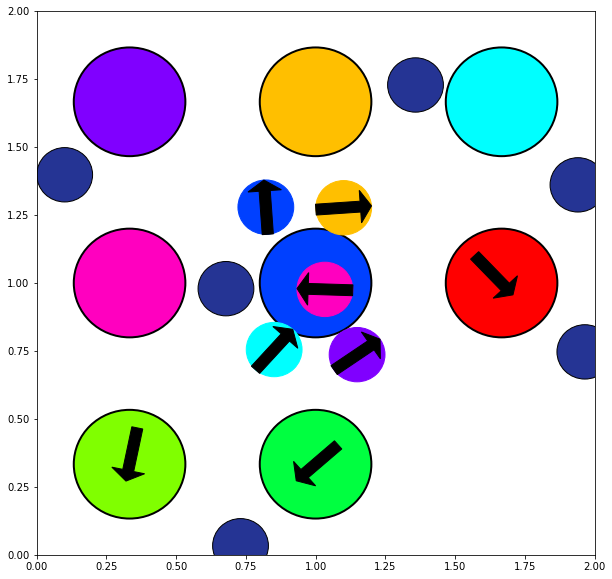

In [24]:
env._render()

In [6]:
env.space_dim

2

In [191]:
mini_len = 10000
mini_decompose_g = None
for _ in tqdm(range(10000)):
    decompose_g = list(env._get_obs_random_k(**OBS_CONFIG_DECOMPOSE))
    if len(decompose_g) < mini_len:
        mini_len = len(decompose_g)
        mini_decompose_g = decompose_g

100%|██████████| 10000/10000 [01:38<00:00, 101.37it/s]


In [192]:
import copy
mini_decompose_g_origin = copy.deepcopy(mini_decompose_g)

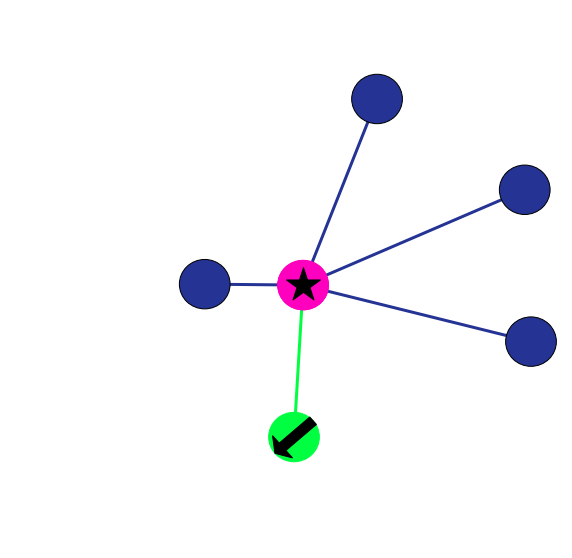

In [382]:
from environment.gym_dubins_car import *
def draw_graph(env, data):
    plt.clf()
    plt.close('all')
    plt.figure(figsize=(10, 10))
    environment_map = env.world.state
    map_x, map_y = env.world.state.shape

    map_width = env.world.state.shape
    colors=env.initColors()
    
    for edge_index in data['a_near_a'].edge_index.T:
        if (edge_index[1]) != 7:
            continue        
        plt.plot(data['agent'].pos[edge_index,0].data.numpy(), data['agent'].pos[edge_index,1].data.numpy(), 
                 color=list(colors.values())[edge_index[0]], linewidth=3, zorder=1)
        
    for edge_index in data['o_near_a'].edge_index.T:
        if (edge_index[1]) != 7:
            continue
        plt.plot(np.concatenate((data['obstacle'].pos[edge_index[0],0].data.numpy().reshape(-1), (data['agent'].pos[edge_index[1],0].data.numpy().reshape(-1)))), 
                 np.concatenate((data['obstacle'].pos[edge_index[0],1].data.numpy().reshape(-1), (data['agent'].pos[edge_index[1],1].data.numpy().reshape(-1)))), 
                 color='#253494', linewidth=3, zorder=1)        
        
    for obstacle_id, obstacle in zip(range(len(env.world.obstacles)), env.world.obstacles):
        if obstacle_id in data['o_near_a'].edge_index[0,data['o_near_a'].edge_index[1,:]==7]:
            circle = patches.Circle((obstacle[0], obstacle[1]), 0.15, edgecolor='black', facecolor='#253494', zorder=2)
            plt.gca().add_patch(circle)

    for agent_id, color, agent, goal in zip(range(env.num_agents), colors.values(), env.world.agents, env.world.agent_goals):
        if agent_id in data['a_near_a'].edge_index[:,data['a_near_a'].edge_index[1,:]==7]:
            circle = patches.Circle((agent[0], agent[1]), 0.15, edgecolor=color, facecolor=color, zorder=2)
            plt.gca().add_patch(circle)
            if agent_id != 7:
                arrow = patches.Arrow(agent[0]-np.cos(agent[2])*(0.15), agent[1]-np.sin(agent[2])*(0.15), np.cos(agent[2])*0.3, np.sin(agent[2])*0.3, width=0.3, edgecolor='black', facecolor='black', zorder=2)
                plt.gca().add_patch(arrow)
    
    circle = patches.Circle((env.world.agents[7][0], env.world.agents[7][1]), 0.15, edgecolor=list(colors.values())[7], 
                            facecolor=list(colors.values())[7], zorder=2)
    plt.gca().add_patch(circle)        
    plt.gca().scatter(env.world.agents[7][0], env.world.agents[7][1], s=1280, marker='*', color='black', zorder=3)                     

    plt.xlim(-0.15, map_width[0]+0.15)
    plt.ylim(-0.15, map_width[1]+0.15)
    # plt.show()        

    fig = plt.gcf()
    fig.canvas.draw()
    plt.axis('off')
    
# draw_graph(env, env._get_obs(**OBS_CONFIG))
# plt.savefig('results/plots/decompose_1.pdf')
for idx in range(11):
    draw_graph(env, mini_decompose_g[idx])
    plt.savefig(f'results/plots/decompose_{idx}.pdf')

In [194]:
mini_decompose_g[6]['o_near_a'].edge_index[0, mini_decompose_g[6]['o_near_a'].edge_index[1,:]==7]

tensor([4])

In [177]:
mini_decompose_g[3]['o_near_a'].edge_index[0, mini_decompose_g[3]['o_near_a'].edge_index[1,:]==7]

tensor([5, 0, 4, 2])

In [184]:
is_remove_edge = (mini_decompose_g[3]['o_near_a'].edge_index[1,:]==7) & ((mini_decompose_g[3]['o_near_a'].edge_index[0,:]==0) | (mini_decompose_g[3]['o_near_a'].edge_index[0,:]==4))
mini_decompose_g[3]['o_near_a'].edge_index = mini_decompose_g[3]['o_near_a'].edge_index[:,~is_remove_edge]
mini_decompose_g[3]['o_near_a'].edge_attr = mini_decompose_g[3]['o_near_a'].edge_attr[~is_remove_edge,:]

In [196]:
mini_decompose_g[1,8,7,6]

TypeError: list indices must be integers or slices, not tuple

In [208]:
eval_action(bnn, mini_decompose_g[1], torch.linspace(-1, 1, steps=2001).reshape(1,-1,1).repeat(env.num_agents,1,1))[1][7]

array([0.10089531, 0.10089027, 0.10074752, ..., 0.10060337, 0.10086117,
       0.10071058], dtype=float32)

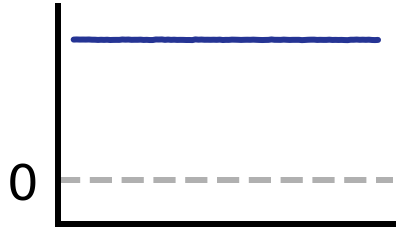

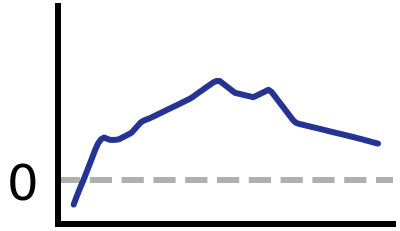

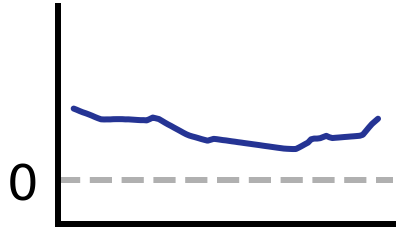

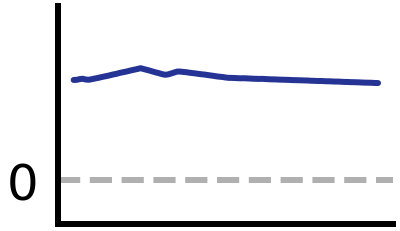

In [303]:
steps = 101
v_all = 100*np.ones(steps,)
vs = []
for graph_id in [1,8,7,6]:

    plt.clf()
    plt.close('all')
    v = eval_action(bnn, mini_decompose_g[graph_id], torch.linspace(-1, 1, steps=steps).reshape(1,-1,1).repeat(env.num_agents,1,1))[1][7]
    vs.append(v)
    v_all = np.minimum(v_all, v)
    lii, = plt.plot(np.linspace(-1, 1, steps), v-THRESHOLD, color='#253494', linewidth=6)
    lii.set_solid_capstyle('round')
    plt.ylim(-0.025, 0.1)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['left'].set_visible(True)
    plt.gca().spines['bottom'].set_visible(True)
    plt.xticks([])
    plt.yticks([0], fontsize=50)
    plt.gca().set_yticklabels(['0 '])
    plt.gca().tick_params(axis=u'both', which=u'both',length=0)
    plt.gca().yaxis.grid(True, linestyle='--', linewidth=6)
    [i.set_linewidth(6) for i in plt.gca().spines.values()]
    plt.savefig(f'results/plots/decompose_landscape_{graph_id}.pdf')
    plt.show()

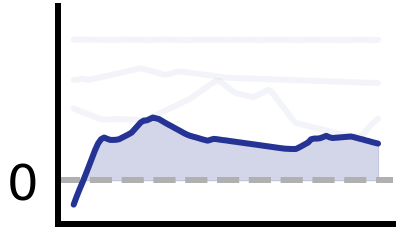

In [324]:
plt.clf()
plt.close('all')
lii, = plt.plot(np.linspace(-1, 1, steps), v_all-THRESHOLD, color='#253494', linewidth=6)
lii.set_solid_capstyle('round')
for v in vs:
    lii, = plt.plot(np.linspace(-1, 1, steps), v-THRESHOLD, color='#253494', alpha=0.05, linewidth=6)
    lii.set_solid_capstyle('round')
plt.ylim(-0.025, 0.1)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().fill_between(np.linspace(-1, 1, steps)[(v_all-THRESHOLD)>0], 0, (v_all-THRESHOLD)[(v_all-THRESHOLD)>0], 
                       color='#253494', alpha=0.2)
plt.xticks([])
plt.yticks([0], fontsize=50)
plt.gca().set_yticklabels(['0 '])
plt.gca().tick_params(axis=u'both', which=u'both',length=0)
plt.gca().yaxis.grid(True, linestyle='--', linewidth=6)
[i.set_linewidth(6) for i in plt.gca().spines.values()]
plt.savefig(f'results/plots/decompose_landscape_all.pdf')
plt.show()

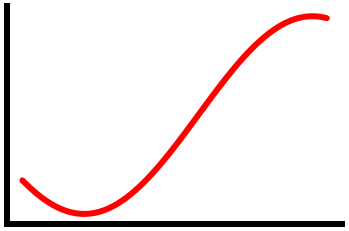

In [336]:
plt.clf()
plt.close('all')
preference = env.potential_field(np.tile(np.linspace(-1, 1, steps).reshape(1, -1, 1), (env.num_agents,1,1)), K1=0, K2=-3e-2, ignore_agent=True)[7]
lii, = plt.plot(np.linspace(-1, 1, steps), -preference, color='red', linewidth=6)
lii.set_solid_capstyle('round')
# plt.ylim(-0.025, 0.1)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.xticks([])
plt.yticks([])
# plt.yticks([0], fontsize=50)
# plt.gca().set_yticklabels(['0 '])
plt.gca().tick_params(axis=u'both', which=u'both',length=0)
# plt.gca().yaxis.grid(True, linestyle='--', linewidth=6)
[i.set_linewidth(6) for i in plt.gca().spines.values()]
plt.savefig(f'results/plots/decompose_preference.pdf')
plt.show()

In [385]:
preference.argmin()

95

In [355]:
[np.linspace(-1, 1, steps)[preference.argmin()]]*2

[0.9000000000000001, 0.9000000000000001]

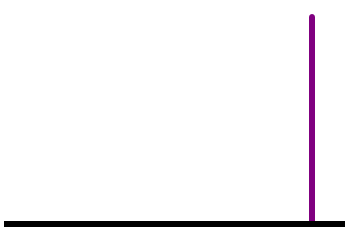

In [383]:
plt.clf()
plt.close('all')
preference = env.potential_field(np.tile(np.linspace(-1, 1, steps).reshape(1, -1, 1), (env.num_agents,1,1)), K1=0, K2=-3e-2, ignore_agent=True)[7]
lii, = plt.plot(np.linspace(-1, 1, steps), 0*np.linspace(-1, 1, steps), color='black', linewidth=6)
lii.set_solid_capstyle('round')
lii, = plt.plot([np.linspace(-1, 1, steps)[preference.argmin()]]*2, [-10, 1.9], color='purple', linewidth=6)
lii.set_solid_capstyle('round')
plt.ylim(0, 2)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.xticks([])
plt.yticks([])
# plt.yticks([0], fontsize=50)
# plt.gca().set_yticklabels(['0 '])
plt.gca().tick_params(axis=u'both', which=u'both',length=0)
# plt.gca().yaxis.grid(True, linestyle='--', linewidth=6)
[i.set_linewidth(6) for i in plt.gca().spines.values()]
plt.savefig(f'results/plots/decompose_final.pdf')
plt.show()

In [388]:
np.linspace(-1, 1, steps)[preference.argmin()]*2*np.pi/3

1.884955592153876

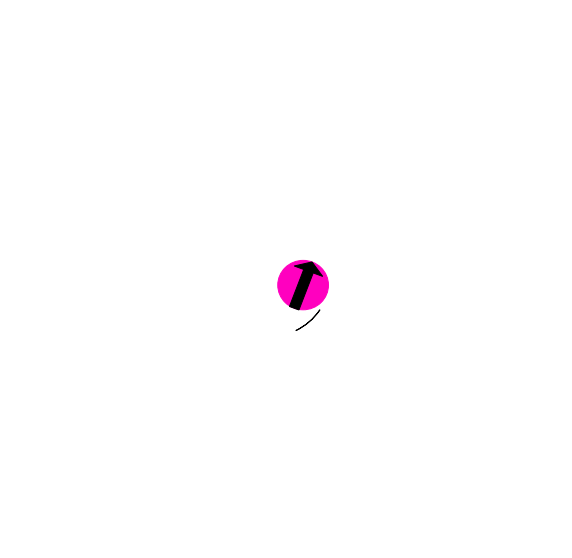

In [398]:
from environment.gym_dubins_car import *
def draw_graph(env, data):
    plt.clf()
    plt.close('all')
    plt.figure(figsize=(10, 10))
    environment_map = env.world.state
    map_x, map_y = env.world.state.shape

    map_width = env.world.state.shape
    colors=env.initColors()
            
    agent = env.world.agents[7]
    circle = patches.Circle((env.world.agents[7][0], env.world.agents[7][1]), 0.15, edgecolor=list(colors.values())[7], 
                            facecolor=list(colors.values())[7], zorder=2)
    arrow = patches.Arrow(agent[0]-np.cos(agent[2])*(0.15), agent[1]-np.sin(agent[2])*(0.15), np.cos(agent[2])*0.3, np.sin(agent[2])*0.3, width=0.3, edgecolor='black', facecolor='black', zorder=3)
    plt.gca().add_patch(arrow)    
    plt.gca().add_patch(circle)                            

    plt.xlim(-0.15, map_width[0]+0.15)
    plt.ylim(-0.15, map_width[1]+0.15)
    # plt.show()        
    
    a3 = patches.FancyArrowPatch((agent[0]-np.cos(agent[2])*(0.15), agent[1]-+np.sin(agent[2])*0.3), (agent[0]+np.cos(agent[2])*0.3, agent[1]-np.sin(agent[2])*(0.15)),
                             connectionstyle="arc3,rad={}".format(0.15))

    plt.gca().add_patch(a3)    

    fig = plt.gcf()
    fig.canvas.draw()
    plt.axis('off')
    
# draw_graph(env, env._get_obs(**OBS_CONFIG))
# plt.savefig('results/plots/decompose_1.pdf')
draw_graph(env, mini_decompose_g[idx])
plt.savefig(f'results/plots/decompose_action.pdf')

<Figure size 432x288 with 0 Axes>

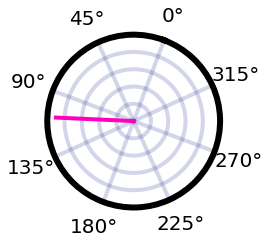

In [534]:
import matplotlib
import numpy as np
from matplotlib.pyplot import figure, show, grid

plt.close('all')
plt.clf()
# make a square figure
fig = figure(figsize=(3, 3))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)
ax.set_yticklabels([])
ax.set_theta_offset(offset=env.world.agents[7][2])
plt.xticks(fontsize=20)

r = np.array([0,1])
plt.grid(color='#253494',alpha=0.2, linewidth=4)
[i.set_linewidth(6) for i in plt.gca().spines.values()]
# tick locations
thetaticks = np.arange(0,360,45)
ax.xaxis.set_tick_params(pad=15.5)
theta = 2*np.pi*r
plt.plot((0, 1.884955592153876), (0,0.9), lw=4, 
          color=list(env.initColors().values())[7], zorder=5)
# ax.plot(theta, r, color=list(env.initColors().values())[7], lw=3)
ax.set_rmax(1.0)
plt.savefig(f'results/plots/decompose_action.pdf', bbox_inches = 'tight')
plt.show()

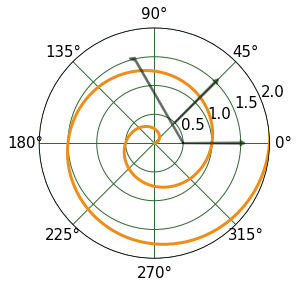

In [476]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# radar green, solid grid lines
plt.rc('grid', color='#316931', linewidth=1, linestyle='-')
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

# force square figure and square axes looks better for polar, IMO
width, height = matplotlib.rcParams['figure.figsize']
size = min(width, height)
# make a square figure
fig = plt.figure(figsize=(size, size))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)

r = np.arange(0, 3.0, 0.01)
theta = 2*np.pi*r
ax.plot(theta, r, color='#ee8d18', lw=3)
ax.set_rmax(2.0)
plt.grid(True)

#This is the line I added:
arr1 = plt.arrow(0, 0.5, 0, 1, alpha = 0.5, width = 0.015,
                 edgecolor = 'black', facecolor = 'green', lw = 2, zorder = 5)

# arrow at 45 degree
arr2 = plt.arrow(45/180.*np.pi, 0.5, 0, 1, alpha = 0.5, width = 0.015,
                 edgecolor = 'black', facecolor = 'green', lw = 2, zorder = 5)\

arr3 = plt.arrow(0, 0.5, 1.8, 1, alpha = 0.5, width = 0.015,
                 edgecolor = 'black', facecolor = 'green', lw = 2, zorder = 5)

plt.show()

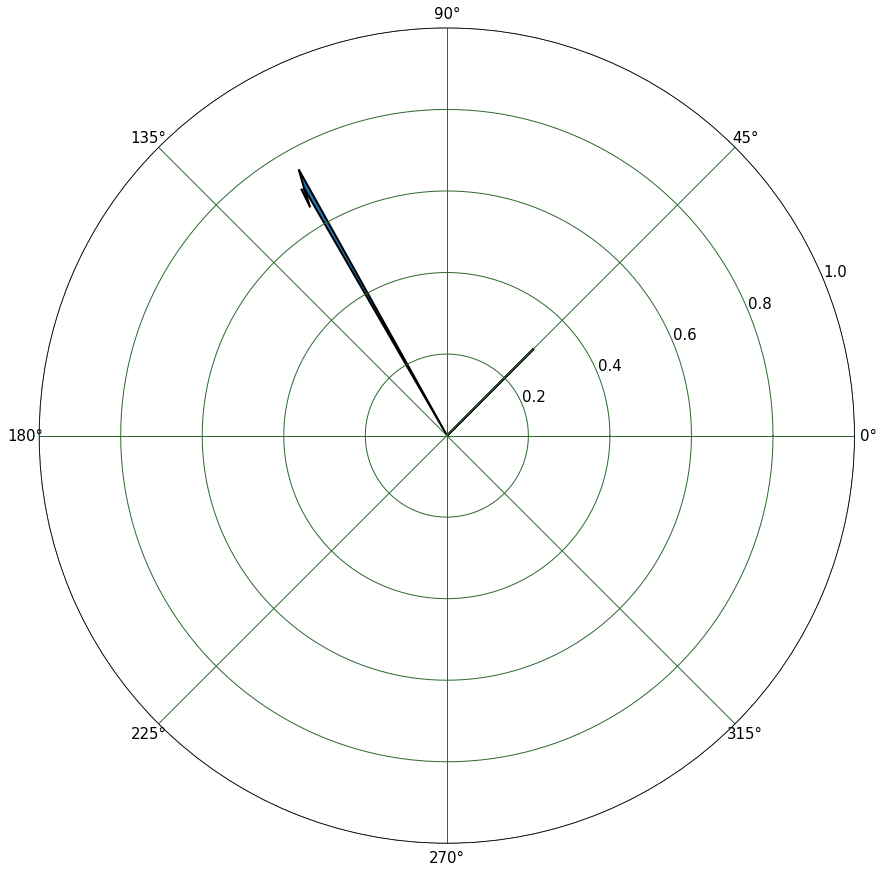

In [486]:
from pylab import figure, arrow, show
import numpy as np
fig = figure(figsize=(15,15))
ax = fig.add_subplot(111, polar=True)
ax.arrow(0.0,0.0,np.pi/4,0.3,lw=2)
ax.arrow(0.0,0.0,2*np.pi/3,0.7,lw=2,head_length=0.01,head_width=0.1)
show()

In [335]:
preference.argmax()

20

In [142]:
with open('dubins_decompose.pkl', 'wb') as f:
    pkl.dump({'agents': env.world.agents, 'obstacles': env.world.obstacles, 'goals': env.world.agent_goals}, f)

In [18]:
BMODEL_PATH

'model_gnn/dbgnn_DubinsCarEnv_v125.pt'

2.23606797749979


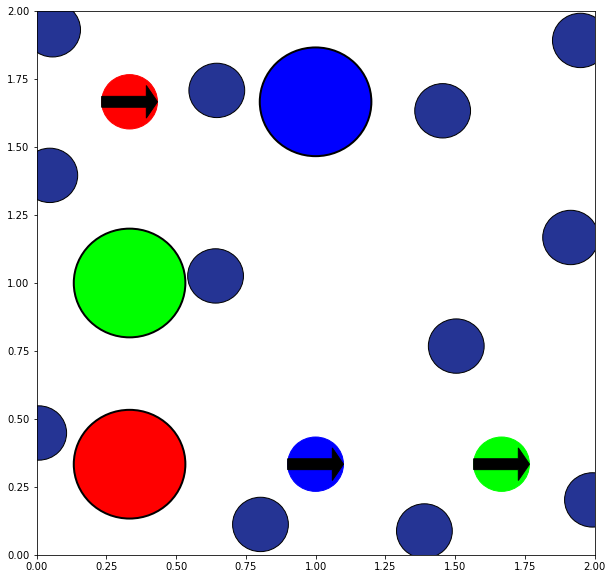

In [4]:
env = create_env()
env._render();
print(np.linalg.norm(env.world.agent_goals[:,:2]-env.world.agents[:,:2], axis=-1).max())

In [ ]:
BMODEL_PATH.replace('.pt', "_current.pt")

In [23]:
%%time 
NUM_AGENTS, OBSTACLE_DENSITY, MAP_SIZE = 2, 1.0, 4

# for num_agents in list(2**np.arange(0, 12)):
#     random.seed(0)
#     np.random.seed(0)
#     torch.manual_seed(0)
    
#     valid_dataset = []
#     for _ in range(100):
#         env = create_env(num_agents=num_agents, size=max(int((num_agents*2)**0.5), 4), max_dist=6)  # num_agents=128, size=16, max_dist=4
#         valid_dataset.append((env.world.obstacles.copy(), env.world.agent_goals.copy(), env.world.agents.copy()))
        
#     import pickle as pkl

#     with open(f'dataset/{project_name}_{num_agents}.pkl', 'wb') as f:
#         pkl.dump(valid_dataset, f)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 4.29 µs


In [4]:
import pickle as pkl
with open(f'dataset/{project_name}_{NUM_AGENTS}.pkl', 'rb') as f:
    valid_dataset = pkl.load(f)

In [24]:
import pickle as pkl
with open(f'dataset/trajs/{project_name}_{NUM_AGENTS}.pkl', 'rb') as f:
    trajs = pkl.load(f)

In [ ]:
import copy

collideds = []
dones = []
lengths = []
neighbor_a = []
neighbor_o = []
for v_idx, data in tqdm(enumerate(valid_dataset)):
    env = create_env(num_agents=NUM_AGENTS, size=max(int((NUM_AGENTS*2)**0.5), 4), density=0, min_dist=0, max_dist=1000)
    env.world.obstacles, env.world.agent_goals, env.world.agents = deepcopy(data)
    # decompose=('random_k', 100)
    gif_file = 'gifs/0427/v125/'+str(v_idx)+f'_{NUM_AGENTS}_decompose_lie.gif'
    # lie_derive_safe=True,
    collided, done, gifs = infer(env,bnn,n_action=100,verbose=True,spatial_prop=False,lie_derive_safe=True,decompose='random',stop_at_collision=True,need_gif=gif_file)
    collideds.append(collided)
    dones.append(done)
    lengths.append(len(gifs))
    
    for gif in gifs:
        env.world.agents = copy.deepcopy(gif)
        try:
            neighbor_a.append(int((env._get_obs(**OBS_CONFIG)['a_near_a'].edge_index[1,:]==1).sum()))
        except:
            neighbor_a.append(0)
        try:
            neighbor_o.append(int((env._get_obs(**OBS_CONFIG)['o_near_a'].edge_index[1,:]==1).sum()))    
        except:
            neighbor_o.append(0)

print(np.any(collideds, axis=-1).mean(), np.mean(collideds), np.mean(dones), np.mean(lengths))

In [ ]:

v_idx = 0
env = create_env(num_agents=NUM_AGENTS, size=max(int((NUM_AGENTS*2)**0.5), 4), density=0, min_dist=0, max_dist=1000)
env.world.obstacles, env.world.agent_goals, env.world.agents = deepcopy(valid_dataset[v_idx])
data = Batch.from_data_list([d for d in env._get_obs_random_k(**OBS_CONFIG_DECOMPOSE)])

In [ ]:
len(data['agent'].x)

In [ ]:
data['agent'].n_id

In [ ]:
n_batch

In [ ]:
a = np.random.uniform(low=-1, high=1, size=(env.num_agents, n_candidates, env.action_dim))
n_batch = int(1000000000/(len(data['agent'].x)*2*(HIDDEN_SIZE+env.action_dim)))
with torch.no_grad():
    with torch.cuda.amp.autocast():
        vec = bnn.get_vec(data.cuda())
        vec = vec.reshape((1+data['agent'].batch.max()), env.num_agents, 1, HIDDEN_SIZE)
        for start_idx in range(0, n_candidates, n_batch):
            print(start_idx)
            action_tensor = torch.tensor(a[:, start_idx:(start_idx+n_batch), :]).cuda()
            action_tensor = action_tensor[data['agent'].n_id, :, :].reshape((1+data['agent'].batch.max()), env.num_agents, -1, 1)
            value = bnn.get_field(vec.repeat((1, 1, n_batch, 1)), action_tensor)

In [ ]:
n_batch

In [ ]:
vec.shape

In [ ]:
import sys
print(sys.getsizeof(vec.storage()))

In [ ]:
import sys
print(sys.getsizeof(action_tensor.storage()))

In [ ]:
len(data['agent'].n_id)

In [ ]:
%debug

In [ ]:
OBS_CONFIG_DECOMPOSE

In [ ]:
data.

In [ ]:
env.num_agents

In [ ]:
np.minimum.reduce([[2, 3, 4], [1, 5, 2], [7,8,-1]])

In [5]:
%%time
v_idx = 0
env = create_env(num_agents=NUM_AGENTS, size=max(int((NUM_AGENTS*2)**0.5), 4), density=0, min_dist=0, max_dist=1000)
env.world.obstacles, env.world.agent_goals, env.world.agents = deepcopy(valid_dataset[v_idx])
# decompose=('random_k', 100)
gif_file = 'gifs/0427/v125/'+str(v_idx)+f'_{NUM_AGENTS}_decompose_lie.gif'
# lie_derive_safe=True,
collided, done, gifs = infer(env,bnn,n_action=100,verbose=True,spatial_prop=False,lie_derive_safe=True,decompose='random',stop_at_collision=True,need_gif=None)

----------------------------------------
0 0.08213550597429276 0.1009722650051117 (array([], dtype=int64),) (array([], dtype=int64),) set()
1 0.07960007339715958 0.10133811086416245 (array([  33,   48,   57,  154,  162,  226,  268,  319,  325,  327,  369,
        412,  506,  563,  567,  571,  707,  739,  780,  782,  862,  895,
        927,  935, 1025, 1076, 1151, 1182, 1194, 1205, 1264, 1286, 1414,
       1418, 1476, 1612, 1627, 1666, 1714, 1776, 1821, 1846, 1852, 1886,
       1887, 1922, 1961, 1996, 2010, 2028, 2043]),) (array([], dtype=int64),) set()
2 0.02860872820019722 0.100788414478302 (array([   5,    9,   22,   24,   34,   37,   43,   44,   45,   48,   57,
         84,   88,  107,  108,  111,  120,  124,  130,  142,  150,  153,
        157,  162,  171,  173,  182,  199,  211,  216,  218,  227,  248,
        249,  257,  262,  270,  273,  281,  283,  291,  300,  319,  322,
        325,  327,  345,  351,  352,  353,  354,  356,  364,  365,  367,
        368,  397,  405,  413,  417

KeyboardInterrupt: 

In [6]:
%debug

> /home/rainorangelemon/Documents/CAM/models.py(1362)get_field()
   1360             action = torch.flatten(torch.cat((torch.sin(action.unsqueeze(-1)*self.div_term), 
   1361                                 torch.cos(action.unsqueeze(-1)*self.div_term)), dim=-1), start_dim=-2)
-> 1362         field = self.field(torch.cat((vec, action), dim=-1))
   1363         if self.mode=='sum':
   1364             field = (field**2).sum(dim=-1)



ipdb>  action.shape


torch.Size([106496, 10, 1])


ipdb>  vec.shape


torch.Size([0, 10, 128])


ipdb>  exit()


In [6]:
%debug

> /home/rainorangelemon/Documents/CAM/models.py(1362)get_field()
   1360             action = torch.flatten(torch.cat((torch.sin(action.unsqueeze(-1)*self.div_term), 
   1361                                 torch.cos(action.unsqueeze(-1)*self.div_term)), dim=-1), start_dim=-2)
-> 1362         field = self.field(torch.cat((vec, action), dim=-1))
   1363         if self.mode=='sum':
   1364             field = (field**2).sum(dim=-1)



ipdb>  import sys; print(sys.getsizeof(vec.storage()))


2097152056


ipdb>  exit()


In [ ]:
data = env._get_obs(**OBS_CONFIG)
print(data)
for data in env._get_obs_random_k(**OBS_CONFIG_DECOMPOSE):
    print(data)

In [ ]:
np.concatenate([np.random.choice([], 0), np.random.choice([1,2], 1), np.random.choice([1,2,3], 1)])

In [ ]:
%debug

In [ ]:
'edge_index' in data['a_near_a']

In [ ]:
env = create_env(num_agents=8, size=4)
env.world.obstacles, env.world.agent_goals, env.world.agents = deepcopy(data)
gif_file = 'gifs/0427/v125/'+str(v_idx)+'_8_decompose.gif'
collided, done, gifs = infer(env,bnn,verbose=True,spatial_prop=False,lie_derive_safe=True,decompose='random',stop_at_collision=True,need_gif=None)

In [ ]:
import matplotlib.pyplot as plt

plt.clf()
plt.close('all')
plt.hist(neighbor_a, bins='auto')
plt.show()

plt.clf()
plt.close('all')
plt.hist(neighbor_o, bins='auto')
plt.show()

In [ ]:
print(np.any(collideds, axis=-1).mean(), np.mean(collideds), np.mean(dones), np.mean(lengths))

In [ ]:
collideds = []
dones = []
lengths = []
for v_idx, data in tqdm(enumerate(valid_dataset)):
    env = create_env(num_agents=8, size=4)
    env.world.obstacles, env.world.agent_goals, env.world.agents = deepcopy(data)
    # env.world.agents[1:,:]=-100
    # env.world.obstacles = [[1.499, 1.499]]
    gif_file = 'gifs/0419/v114_decompose/'+str(v_idx)+'_group.gif'
    collided, done, gifs = infer(env,bnn,threshold=5e-2,verbose=False,spatial_prop=False,stop_at_collision=False,decompose=('group_k', None),need_gif=gif_file)
    collideds.append(collided)
    dones.append(done)
    lengths.append(len(gifs))
    
print(np.any(collideds, axis=-1).mean(), np.mean(collideds), np.mean(dones), np.mean(lengths))

In [ ]:
collideds = []
dones = []
lengths = []
for v_idx, data in tqdm(enumerate(valid_dataset)):
    env = create_env(num_agents=8, size=4)
    env.world.obstacles, env.world.agent_goals, env.world.agents = deepcopy(data)
    # env.world.agents[1:,:]=-100
    # env.world.obstacles = [[1.499, 1.499]]
    gif_file = 'gifs/0419/v114_decompose/'+str(v_idx)+'_prop.gif'
    collided, done, gifs = infer(env,bnn,threshold=5e-2,verbose=False,spatial_prop=True,stop_at_collision=False,decompose=None,need_gif=gif_file)
    collideds.append(collided)
    dones.append(done)
    lengths.append(len(gifs))
    
print(np.any(collideds, axis=-1).mean(), np.mean(collideds), np.mean(dones), np.mean(lengths))

In [ ]:
%%time
collideds = []
dones = []
lengths = []
env = create_env(num_agents=2048, size=64, max_dist=8)
# env.world.obstacles, env.world.agent_goals, env.world.agents = deepcopy(data)
# env.world.agents[1:,:]=-100
# env.world.obstacles = [[1.499, 1.499]]
gif_file = 'gifs/0424/v120/2048.mp4'
collided, done, gifs = infer(env,bnn,n_action=100,max_episode_length=256,lie_derive_safe=True,threshold=1e-1,verbose=False,spatial_prop=False,stop_at_collision=False,decompose=None,need_gif=gif_file)
collideds.append(collided)
dones.append(done)
lengths.append(len(gifs))
    
print(np.any(collideds, axis=-1).mean(), np.mean(collideds), np.mean(dones), np.mean(lengths))

In [ ]:
collideds = []
dones = []
lengths = []
for v_idx, data in tqdm(enumerate(valid_dataset)):
    env = create_env(num_agents=32, size=8)
    env.world.obstacles, env.world.agent_goals, env.world.agents = deepcopy(data)
    # env.world.agents[1:,:]=-100
    # env.world.obstacles = [[1.499, 1.499]]
    gif_file = 'gifs/0424/v120/'+str(v_idx)+'_32_vanilla.gif'
    collided, done, gifs = infer(env,bnn,threshold=5e-2,verbose=False,spatial_prop=False,stop_at_collision=True,decompose=None,need_gif=gif_file)
    # lie_derive_safe=True,
    collideds.append(collided)
    dones.append(done)
    lengths.append(len(gifs))

print(np.any(collideds, axis=-1).mean(), np.mean(collideds), np.mean(dones), np.mean(lengths))

In [ ]:
collideds = []
dones = []
lengths = []
for v_idx, data in tqdm(enumerate(valid_dataset)):
    env = create_env(num_agents=32, size=8)
    env.world.obstacles, env.world.agent_goals, env.world.agents = deepcopy(data)
    # env.world.agents[1:,:]=-100
    # env.world.obstacles = [[1.499, 1.499]]
    gif_file = 'gifs/0424/v120/'+str(v_idx)+'_32_vanilla_lie.gif'
    collided, done, gifs = infer(env,bnn,lie_derive_safe=True,threshold=5e-2,verbose=False,spatial_prop=False,stop_at_collision=True,decompose=None,need_gif=gif_file)
    collideds.append(collided)
    dones.append(done)
    lengths.append(len(gifs))

print(np.any(collideds, axis=-1).mean(), np.mean(collideds), np.mean(dones), np.mean(lengths))

In [ ]:
import copy

collideds = []
dones = []
lengths = []
neighbor_o = []
neighbor_a = []
for v_idx, data in tqdm(enumerate(valid_dataset)):
    env = create_env()
    # env.world.obstacles, env.world.agent_goals, env.world.agents = deepcopy(data)
    # env.world.agents[1:,:]=-100
    # env.world.obstacles = [[1.499, 1.499]]
    gif_file = 'gifs/0426/v122/'+str(v_idx)+'_random.gif'
    collided, done, gifs = infer(env,bnn,verbose=False,spatial_prop=False,stop_at_collision=False,decompose=None,need_gif=gif_file)
    # lie_derive_safe=True,threshold=1e-1
    collideds.append(collided)
    dones.append(done)
    lengths.append(len(gifs))

    for gif in gifs:
        env.obstacle_obs_radius = 1.5
        env.agent_obs_radius = 1.5
        env.world.agents = copy.deepcopy(gif)
        neighbor_a.append(int((env._get_obs(**OBS_CONFIG)['a_near_a'].edge_index[1,:]==1).sum()))
        neighbor_o.append(int((env._get_obs(**OBS_CONFIG)['o_near_a'].edge_index[1,:]==1).sum()))

print(np.any(collideds, axis=-1).mean(), np.mean(collideds), np.mean(dones), np.mean(lengths))
print(np.min(neighbor_o), np.max(neighbor_o), np.min(neighbor_a), np.max(neighbor_a))

In [ ]:
print(np.any(collideds, axis=-1).mean(), np.mean(collideds), np.mean(dones), np.mean(lengths))
print(np.min(neighbor_o), np.max(neighbor_o), np.min(neighbor_a), np.max(neighbor_a))

In [ ]:
np.where(np.array(neighbor_a)==14)

In [ ]:
import matplotlib.pyplot as plt
plt.clf()
plt.close('all')
plt.hist(neighbor_a, bins='auto')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.clf()
plt.close('all')
plt.hist(neighbor_o, bins='auto')
plt.show()

In [ ]:
collideds = []
dones = []
lengths = []
for v_idx, data in tqdm(enumerate(valid_dataset)):
    env = create_env(num_agents=128, size=16)
    env.world.obstacles, env.world.agent_goals, env.world.agents = deepcopy(data)
    # env.world.agents[1:,:]=-100
    # env.world.obstacles = [[1.499, 1.499]]
    gif_file = 'gifs/0424/v120/'+str(v_idx)+'_128_1e-1_vanilla_lie.gif'
    collided, done, gifs = infer(env,bnn,lie_derive_safe=True,threshold=1e-1,verbose=False,spatial_prop=False,stop_at_collision=True,decompose=None,need_gif=gif_file)
    print([s for s in env.world.get_status() if 'danger' in s])
    collideds.append(collided)
    dones.append(done)
    lengths.append(len(gifs))

print(np.any(collideds, axis=-1).mean(), np.mean(collideds), np.mean(dones), np.mean(lengths))

In [ ]:
print(np.any(collideds, axis=-1).mean(), np.mean(collideds), np.mean(dones), np.mean(lengths))

In [ ]:
len(collideds)

In [ ]:
collideds = []
dones = []
lengths = []
for v_idx, data in tqdm(enumerate(valid_dataset)):
    env = create_env(num_agents=8, size=4)
    env.world.obstacles, env.world.agent_goals, env.world.agents = deepcopy(data)
    # env.world.agents[1:,:]=-100
    # env.world.obstacles = [[1.499, 1.499]]
    collided, done, gifs = infer(env,bnn,threshold=2e-2,verbose=False,spatial_prop=False,stop_at_collision=True,decompose=None,need_gif=None)
    collideds.append(collided)
    dones.append(done)
    lengths.append(len(gifs))
    
print(np.any(collideds, axis=-1).mean(), np.mean(collideds), np.mean(dones), np.mean(lengths))

In [ ]:
collideds = []
dones = []
lengths = []
for v_idx, data in tqdm(enumerate(valid_dataset)):
    env = create_env(num_agents=128, size=16)
    env.world.obstacles, env.world.agent_goals, env.world.agents = deepcopy(data)
    # env.world.agents[1:,:]=-100
    # env.world.obstacles = [[1.499, 1.499]]
    gif_file = 'gifs/0424/v120/'+str(v_idx)+'_128_vanilla.gif'
    collided, done, gifs = infer(env,bnn,max_episode_length=1024,threshold=5e-2,verbose=False,spatial_prop=False,stop_at_collision=False,decompose=None,need_gif=gif_file)
    collideds.append(collided)
    dones.append(done)
    lengths.append(len(gifs))
    
print(np.any(collideds, axis=-1).mean(), np.mean(collideds), np.mean(dones), np.mean(lengths))

In [ ]:
env.world.obstacles, env.world.agent_goals, env.world.agents = deepcopy(data)
print(np.linalg.norm(env.world.agent_goals[:,:2]-env.world.agents[:,:2], axis=-1).max())

In [ ]:
'''
0: safe (wrong predict)
6: unsafe (good predict)
9: safe (wrong precit)
12: unsafe (good predict)
14: safe (wrong precit)
16: unsafe (good predict)
17: safe (wrong precit)
19: unsafe (good predict)
'''

collideds = []
dones = []
lengths = []

env = create_env(num_agents=128, size=16)
env.world.obstacles, env.world.agent_goals, env.world.agents = deepcopy(valid_dataset[19])
collided, done, gifs = infer(env,bnn,threshold=1e-1,lie_derive_safe=True,verbose=True,spatial_prop=False,stop_at_collision=True,decompose=None,need_gif=None)
collideds.append(collided)
dones.append(done)
lengths.append(len(gifs))
    
print(np.any(collideds, axis=-1).mean(), np.mean(collideds), np.mean(dones), np.mean(lengths))

In [ ]:
collideds = []
dones = []
lengths = []

env = create_env(num_agents=128, size=16)
env.world.obstacles, env.world.agent_goals, env.world.agents = deepcopy(valid_dataset[19])
collided, done, gifs = infer(env,bnn,threshold=1e-1,lie_derive_safe=True,verbose=True,spatial_prop=False,stop_at_collision=True,decompose=None,need_gif=None)
collideds.append(collided)
dones.append(done)
lengths.append(len(gifs))
    
print(np.any(collideds, axis=-1).mean(), np.mean(collideds), np.mean(dones), np.mean(lengths))

In [ ]:
collideds = []
dones = []
lengths = []
for v_idx, data in tqdm(enumerate(valid_dataset)):
    env = create_env(num_agents=8, size=4)
    env.world.obstacles, env.world.agent_goals, env.world.agents = deepcopy(data)
    # env.world.agents[1:,:]=-100
    # env.world.obstacles = [[1.499, 1.499]]
    gif_file = 'gifs/0419/v114_decompose/'+str(v_idx)+'_vanilla_obstacle.gif'
    collided, done, gifs = infer(env,bnn,threshold=5e-2,verbose=False,spatial_prop=False,stop_at_collision=False,decompose=None,need_gif=gif_file)
    collideds.append(collided)
    dones.append(done)
    lengths.append(len(gifs))
    
print(np.any(collideds, axis=-1).mean(), np.mean(collideds), np.mean(dones), np.mean(lengths))

In [ ]:
collideds = []
dones = []
lengths = []
for v_idx, data in tqdm(enumerate(valid_dataset)):
    env = create_env(num_agents=32, size=8)
    env.world.obstacles, env.world.agent_goals, env.world.agents = deepcopy(data)
    # env.world.agents[1:,:]=-100
    # env.world.obstacles = [[1.499, 1.499]]
    gif_file = 'gifs/0419/v114_decompose/'+str(v_idx)+'_vanilla_32.gif'
    collided, done, gifs = infer(env,bnn,threshold=5e-2,verbose=False,spatial_prop=False,stop_at_collision=False,decompose=None,need_gif=gif_file)
    collideds.append(collided)
    dones.append(done)
    lengths.append(len(gifs))
    
print(np.any(collideds, axis=-1).mean(), np.mean(collideds), np.mean(dones), np.mean(lengths))

In [ ]:
collideds = []
dones = []
lengths = []
for v_idx, data in tqdm(enumerate(valid_dataset)):
    env = create_env(num_agents=32, size=8)
    env.world.obstacles, env.world.agent_goals, env.world.agents = deepcopy(data)
    # env.world.agents[1:,:]=-100
    # env.world.obstacles = [[1.499, 1.499]]
    gif_file = 'gifs/0419/v114_decompose/'+str(v_idx)+'_vanilla_32_obstacle.gif'
    collided, done, gifs = infer(env,bnn,threshold=5e-2,verbose=False,spatial_prop=False,stop_at_collision=False,decompose=None,need_gif=gif_file)
    collideds.append(collided)
    dones.append(done)
    lengths.append(len(gifs))
    
print(np.any(collideds, axis=-1).mean(), np.mean(collideds), np.mean(dones), np.mean(lengths))

In [ ]:
collideds = []
dones = []
lengths = []
for v_idx, data in enumerate(valid_dataset):
    print(str(v_idx) + '------------------------------------------------------------------------------------------------------------------------------')
    env = create_env(num_agents=8, size=4)
    env.world.obstacles, env.world.agent_goals, env.world.agents = deepcopy(data)
    # env.world.agents[1:,:]=-100
    # env.world.obstacles = [[1.499, 1.499]]
    gif_file = 'gifs/0419/v114_decompose/'+str(v_idx)+'_verbose.gif'
    collided, done, gifs = infer(env,bnn,threshold=5e-2,verbose=True,
                                 spatial_prop=False,stop_at_collision=True,decompose=None,need_gif=gif_file)
    collideds.append(collided)
    dones.append(done)
    lengths.append(len(gifs))
    
print(np.any(collideds, axis=-1).mean(), np.mean(collideds), np.mean(dones), np.mean(lengths))

In [ ]:
def choose_action(bnn, env, explore_eps, nominal_eps, spatial_prop, threshold, n_action=None, decompose=None, step=0):
    if n_action is None:
        n_action = n_candidates
    
    
    if nominal_eps > 0:
        K1 = 1e-1
        K2 = -3e-2
    else:
        K1 = 0.
        K2 = -3e-2
    
    if decompose is None:
        o = env._get_obs()
        a_all = np.random.uniform(-1, 1, size=(env.num_agents, n_action, env.action_dim))
        a_refines, bvalues = eval_action(bnn, o, a_all, max_iter=0, threshold=threshold)
    else:
        a_all = np.random.uniform(-1, 1, size=(env.num_agents, n_action, env.action_dim))
        bvalues = np.ones(shape=(env.num_agents, n_action))
        decompose_way, decompose_iter = decompose
        if decompose_way == 'random_k':
            for _ in range(decompose_iter):
                o = eval('env._get_obs_'+decompose_way)()
                a_refines, bvalues_current = eval_action(bnn, o, a_all, max_iter=0, threshold=threshold)  
                bvalues = np.minimum(bvalues, bvalues_current)
        
        elif decompose_way == 'group_k':
            r_graph = env._get_obs(rgraph_a=True, rgraph_o=False)
            prefer_center = set(np.random.permutation(env.num_agents))
            r_edge_index = r_graph['a_near_a'].edge_index
            edge_mask = torch.zeros_like(r_graph['a_near_a'].edge_index[0,:]).bool()
            while len(prefer_center):
                result = env._get_obs_group_k(np.random.permutation(list(prefer_center)), loop=False, clip=True)
                edge_mask = edge_mask | result[3]
                prefer_center = (prefer_center - result[2]) & set(r_edge_index[:,~edge_mask].unique().data.numpy())
                o = result[0]
                a_refines, bvalues_current = eval_action(bnn, o, a_all, max_iter=0, threshold=threshold)  
                bvalues[np.array(list(result[1])),:] = np.minimum(bvalues[np.array(list(result[1])),:], 
                                                                  bvalues_current[np.array(list(result[1])),:])

        else:
            assert False       
        
        

    dists = env.potential_field(a_refines, K1=K1, K2=K2, ignore_agent=(nominal_eps <= 0))
    v = np.zeros(env.num_agents)
    a = np.zeros((env.num_agents, env.action_dim))
    feasibles = np.zeros(env.num_agents)
    evil_agents = set()
    for agent_id, a_refine, bvalue, dist in zip(np.arange(env.num_agents), a_refines, bvalues, dists):

        if np.random.rand() < nominal_eps:
            a[agent_id] = a_refine[np.argsort(dist)[0]]
            feasibles[agent_id] = 1
            continue
        
        feasible_current = False
        if np.any(bvalue>threshold):
            feasible_current = True
        else:
            feasible_current = False
            
        if feasible_current:
            feasibles[agent_id] = 1
            for a_idx in np.argsort(dist):
                if bvalue[a_idx] > threshold:
                    a[agent_id] = a_refine[a_idx]
                    v[agent_id] = bvalue[a_idx]
                    break
            continue

        if spatial_prop:
            local_evils = set()
            # find evil_agent
            local_o = o.clone()
            while True:
                local_o.to('cpu')
                edges = local_o['a_near_a'].edge_index
                neighbor_edges = edges[1]==agent_id
                if neighbor_edges.sum()==0:
                    break

                first_edge = torch.where(neighbor_edges)[0][0]
                mask = (torch.arange(edges.shape[1])==first_edge)
                local_evils.add(int(edges[0, first_edge]))
                local_o['a_near_a'].edge_index = edges[:,~mask]
                local_o['a_near_a'].edge_attr = local_o['a_near_a'].edge_attr[~mask,:]

                local_a_refines, local_bvalues = eval_action(bnn, local_o, a_all, max_iter=0, threshold=threshold)

                if np.any(local_bvalues[agent_id]>threshold):
                    evil_agents = evil_agents | local_evils
                    break
                    
        if np.random.rand()<explore_eps:
            a_idx = np.random.randint(n_action)
            a[agent_id] = a_refine[a_idx]
            if a_idx != np.argmax(bvalue):
                feasibles[agent_id] = 1  # mask the random action            
            continue
        else:
            a[agent_id] = a_refine[np.argmax(bvalue)]
            v[agent_id] = bvalue[np.argmax(bvalue)]

    for evil_agent in evil_agents:
        a_refine, bvalue = a_refines[evil_agent], bvalues[evil_agent]
        a[evil_agent] = a_refine[np.argmax(bvalue)]
        v[evil_agent] = bvalue[np.argmax(bvalue)]
        
    print(bvalues[2].max(), bvalues[2].min())
        
    return a, v, feasibles, evil_agents

@torch.no_grad()
def infer(env, bnn, threshold=None, max_episode_length=256, 
          n_action=None,
          verbose=False, seed=0, stop_at_collision=False, 
          spatial_prop=None, need_gif=None, decompose=None):
    
    if spatial_prop is None:
        spatial_prop = SPATIAL_PROP
        
    if n_action is None:
        n_action = n_candidates
    
    if threshold is None:
        threshold=THRESHOLD
    if verbose:
        print('----------------------------------------')
        
    torch.manual_seed(seed)
    random.seed(seed)
    np.random.seed(seed)
    
    if need_gif is not None:
        paths = [deepcopy(env.world.agents)]
    else:
        paths = [None]
    total_trans=0; n_danger=0; no_feasible=0; collided=np.zeros(env.num_agents).astype(bool)

    while True:
        
        a, v, feasibles, evil_agents = choose_action(bnn=bnn, env=env, explore_eps=0, 
                                                     nominal_eps=0, 
                                                     spatial_prop=spatial_prop, 
                                                     threshold=threshold,
                                                     n_action=n_action,
                                                     decompose=decompose,
                                                     step=total_trans)
        next_o, rw, done, info = env.step(a)
        
        prev_danger = info['prev_danger'].data.cpu().numpy().astype(bool)
        next_danger = info['next_danger'].data.cpu().numpy().astype(bool)
        if np.any(next_danger):
            collided = collided | next_danger
        if verbose:
            print(total_trans, info['o_near_a'].edge_attr[2,:], v[2], next_danger, evil_agents)
            
        total_trans += 1
        if need_gif is not None:
            paths.append(deepcopy(env.world.agents))
        else:
            paths.append(None)

        if np.any(next_danger) and stop_at_collision:
            break        
        
        if done or (total_trans >= max_episode_length):
            break
            
    if need_gif is not None:
        env.save_fig(paths, env.world.agent_goals, env.world.obstacles, need_gif[:-4]+'_'+str(np.any(collided))+'_'+str(done)+need_gif[-4:])

    return collided, done, paths

In [ ]:
np.where(np.any(collideds, axis=-1))

In [ ]:
v_idx = 96
data = valid_dataset[v_idx]
env = create_env(num_agents=8, size=4)
env.world.obstacles, env.world.agent_goals, env.world.agents = deepcopy(data)
# env.world.agents[1:,:]=-100
# env.world.obstacles = [[1.499, 1.499]]
gif_file = 'gifs/0419/v114_decompose/'+str(v_idx)+'_verbose.gif'
collided, done, gifs = infer(env,bnn,threshold=5e-2,verbose=True,
                             spatial_prop=False,stop_at_collision=True,decompose=None,need_gif=gif_file)

In [ ]:
env._get_obs()['o_near_a']

In [ ]:
from torch_geometric.loader import NeighborLoader

In [ ]:
env = create_env(num_agents=2048, size=64)

In [ ]:
env._get_obs_group_k(np.random.permutation(env.num_agents), loop=False, clip=True)[-1]

In [ ]:
%debug

In [ ]:
env = create_env(num_agents=8, size=4)
env._render();

In [ ]:
%debug

In [ ]:
from torch_geometric.loader import NeighborLoader
loader = NeighborLoader(env._get_obs(rgraph=True), 
               input_nodes=('agent', list(np.arange(env.num_agents))),
               num_neighbors={('agent', 'a_near_a', 'agent'):[2], 
                              ('obstacle', 'o_near_a', 'agent'):[1], 
                              ('goal', 'toward', 'agent'):[1]}, replace=False, directed=True, batch_size=env.num_agents)

In [ ]:
data = next(iter(loader))

In [ ]:
env._get_obs()['o_near_a']

In [ ]:
env._get_obs(rgraph=True)['obstacle']

In [ ]:
data['o_near_a']

In [ ]:
%debug

In [ ]:
env._get_obs(rgraph_a=True)['a_near_a'].edge_index

In [ ]:
env._get_obs()['o_near_a'].edge_index

In [ ]:
env._get_obs_random_k()['a_near_a'].edge_index

In [ ]:
env._get_obs_group_k(np.arange(env.num_agents))

In [ ]:
np.array([[1,2,3,4,5,6,7,8,9]])[:,np.array(list({0,6,7}))]

In [ ]:
np.where(1-np.array(dones))

In [ ]:
%debug

# generalization

In [ ]:
valid_dataset = []
for _ in range(1):
    # while True:
    # env = create_env(num_agents=2048, size=64)
    env = create_env(num_agents=2048, size=64)
    valid_dataset.append((env.world.obstacles.copy(), env.world.agent_goals.copy(), env.world.agents.copy()))

In [ ]:
collideds = []
dones = []
lengths = []
for v_idx, data in tqdm(enumerate(valid_dataset)):
    env = create_env(num_agents=2048, size=64, density=0)
    env.world.obstacles, env.world.agent_goals, env.world.agents = deepcopy(data)
    gif_file = 'gifs/0416/v115/2048_'+str(v_idx)+'.mp4'
    collided, done, gifs = infer(env,bnn,max_episode_length=1000,threshold=5e-2,verbose=False,spatial_prop=False,stop_at_collision=False,need_gif=None)
    collideds.append(collided)
    dones.append(done)
    lengths.append(len(gifs))
    
print(np.mean(collideds), np.mean(dones), np.mean(lengths))

In [ ]:
collideds = []
dones = []
lengths = []
for v_idx, data in tqdm(enumerate(valid_dataset)):
    env = create_env(num_agents=2048, size=64, density=0)
    env.world.obstacles, env.world.agent_goals, env.world.agents = deepcopy(data)
    gif_file = 'gifs/0416/v115/2048_'+str(v_idx)+'.mp4'
    collided, done, gifs = infer(env,bnn,max_episode_length=1000,threshold=5e-2,verbose=False,spatial_prop=False,stop_at_collision=False,need_gif=None)
    collideds.append(collided)
    dones.append(done)
    lengths.append(len(gifs))
    
print(np.mean(collideds), np.mean(dones), np.mean(lengths))

In [ ]:
collideds = []
dones = []
lengths = []
for v_idx, data in tqdm(enumerate(valid_dataset)):
    env = create_env(num_agents=2048, size=64, density=0)
    env.world.obstacles, env.world.agent_goals, env.world.agents = deepcopy(data)
    gif_file = 'gifs/0416/v115/2048_'+str(v_idx)+'.mp4'
    collided, done, gifs = infer(env,bnn,max_episode_length=1000,threshold=3e-2,verbose=False,spatial_prop=False,stop_at_collision=False,need_gif=None)
    collideds.append(collided)
    dones.append(done)
    lengths.append(len(gifs))
    
print(np.mean(collideds), np.mean(dones), np.mean(lengths))

In [ ]:
%debug

In [ ]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.animation import FFMpegWriter

plt.clf()
plt.close('all')

# Fixing random state for reproducibility
np.random.seed(19680801)


# Create new Figure and an Axes which fills it.
fig = plt.figure(figsize=(7, 7))
ax = fig.add_axes([0, 0, 1, 1], frameon=False)
ax.set_xlim(0, 1), ax.set_xticks([])
ax.set_ylim(0, 1), ax.set_yticks([])

# Create rain data
n_drops = 50
rain_drops = np.zeros(n_drops, dtype=[('position', float, 2),
                                      ('size',     float, 1),
                                      ('growth',   float, 1),
                                      ('color',    float, 4)])

# Initialize the raindrops in random positions and with
# random growth rates.
rain_drops['position'] = np.random.uniform(0, 1, (n_drops, 2))
rain_drops['growth'] = np.random.uniform(50, 200, n_drops)

# Construct the scatter which we will update during animation
# as the raindrops develop.
scat = ax.scatter(rain_drops['position'][:, 0], rain_drops['position'][:, 1],
                  s=rain_drops['size'], lw=0.5, edgecolors=rain_drops['color'],
                  facecolors='none')


def update(frame_number):
    # Get an index which we can use to re-spawn the oldest raindrop.
    current_index = frame_number % n_drops

    # Make all colors more transparent as time progresses.
    rain_drops['color'][:, 3] -= 1.0/len(rain_drops)
    rain_drops['color'][:, 3] = np.clip(rain_drops['color'][:, 3], 0, 1)

    # Make all circles bigger.
    rain_drops['size'] += rain_drops['growth']

    # Pick a new position for oldest rain drop, resetting its size,
    # color and growth factor.
    rain_drops['position'][current_index] = np.random.uniform(0, 1, 2)
    rain_drops['size'][current_index] = 5
    rain_drops['color'][current_index] = (0, 0, 0, 1)
    rain_drops['growth'][current_index] = np.random.uniform(50, 200)

    # Update the scatter collection, with the new colors, sizes and positions.
    scat.set_edgecolors(rain_drops['color'])
    scat.set_sizes(rain_drops['size'])
    scat.set_offsets(rain_drops['position'])


# Construct the animation, using the update function as the animation director.
animation = FuncAnimation(fig, update, frames=200, interval=10)
f = r"animation.mp4" 
writermp4 = FFMpegWriter(fps=60) 
animation.save(f, writer=writermp4)

In [ ]:
@torch.no_grad()
def infer(env, bnn, threshold=None, max_episode_length=256, verbose=False, seed=0, stop_at_collision=False, prop=None, need_gif=True):
    if prop is None:
        prop = PROP
    
    if threshold is None:
        threshold=THRESHOLD
    if verbose:
        print('----------------------------------------')
        
    torch.manual_seed(seed)
    random.seed(seed)
    np.random.seed(seed)
    
    if need_gif:
        gifs = [env._render()]
    else:
        gifs = [None]
    total_trans=0; n_danger=0; no_feasible=0; collided=np.zeros(env.num_agents).astype(bool)

    while True:
        o = env._get_obs()
        a_all = np.random.uniform(-1, 1, size=(env.num_agents, n_candidates, env.action_dim))
        a_refines, bvalues = eval_action(bnn, o, a_all, max_iter=0, threshold=threshold)

        dists = env.potential_field(a_refines, K1=K1, K2=K2, ignore_agent=True)
        
        v = np.zeros(env.num_agents)
        a = np.zeros((env.num_agents, env.action_dim))
        evil_agents = set()
        for agent_id, a_refine, bvalue, dist in zip(np.arange(env.num_agents), a_refines, bvalues, dists):
            
            feasible_current = False
            if np.any(bvalue>threshold):
                feasible_current = True
            else:
                feasible_current = False
            
            if feasible_current:
                for a_idx in np.argsort(dist):
                    if bvalue[a_idx] > threshold:
                        a[agent_id] = a_refine[a_idx]
                        v[agent_id] = bvalue[a_idx]
                        break
                continue
            
            if prop:
                # find evil_agent
                local_o = o.clone()
                while True:
                    local_o.to('cpu')
                    edges = local_o['a_near_a'].edge_index
                    neighbor_edges = edges[1]==agent_id
                    if neighbor_edges.sum()==0:
                        break

                    first_edge = torch.where(neighbor_edges)[0][0]
                    mask = (torch.arange(edges.shape[1])==first_edge)
                    evil_agents.add(int(edges[0, first_edge]))
                    local_o['a_near_a'].edge_index = edges[:,~mask]
                    local_o['a_near_a'].edge_attr = local_o['a_near_a'].edge_attr[~mask,:]

                    local_a_refines, local_bvalues = eval_action(bnn, local_o, a_all, max_iter=0, threshold=threshold)          
                    # bvalues[agent_id] = bvalue = local_bvalues[agent_id]
                    # a_refine = local_a_refines[agent_id]

                    if np.any(local_bvalues>threshold):
                        break
            
            no_feasible += 1
            a[agent_id] = a_refine[np.argmax(bvalue)]
            v[agent_id] = bvalue[np.argmax(bvalue)]
                
        for evil_agent in evil_agents:
            a_refine, bvalue = a_refines[evil_agent], bvalues[evil_agent]
            a[evil_agent] = a_refine[np.argmax(bvalue)]
            v[evil_agent] = bvalue[np.argmax(bvalue)]

        next_o, rw, done, info = env.step(a)
        
        prev_danger = info['prev_danger'].data.cpu().numpy().astype(bool)
        next_danger = info['next_danger'].data.cpu().numpy().astype(bool)
        if np.any(next_danger):
            collided = collided | next_danger
        if verbose:
            print(total_trans, np.where(v<=threshold), next_danger, evil_agents)
            
        total_trans += 1
        if need_gif:
            gifs.append(env._render())
        else:
            gifs.append(None)

        if np.any(next_danger) and stop_at_collision:
            break        
        
        if done or (total_trans >= max_episode_length):
            break

    return collided, done, gifs

In [ ]:
env = create_env()
env.world.obstacles, env.world.agent_goals, env.world.agents = deepcopy(valid_dataset[17])
_, _, gifs = infer(env, bnn, verbose=True,prop=True,stop_at_collision=True)
save_gif(gifs, 'gifs/0406/v59/shit2.gif')

In [ ]:
env.initColors()[6]

In [ ]:
edges = env._get_obs()['a_near_a'].edge_index
edges[0,edges[1]==5]

In [ ]:
valid_dataset[17][1]

In [ ]:
o = env._get_obs()
o = o.clone()

evil_agents = []
while True:
    o.to('cpu')
    agent_id = 0
    edges = o['a_near_a'].edge_index
    neighbor_edges = edges[1]==agent_id
    if neighbor_edges.sum()==0:
        break
    
    first_edge = torch.where(neighbor_edges)[0][0]
    mask = (torch.arange(edges.shape[1])==first_edge)
    evil_agents.append(int(edges[0, first_edge]))
    o['a_near_a'].edge_index = edges[:,~mask]
    o['a_near_a'].edge_attr = o['a_near_a'].edge_attr[~mask,:]

    a_all = np.random.uniform(-1, 1, size=(env.num_agents, n_candidates, env.action_dim))
    a_refines, bvalues = eval_action(bnn, o, a_all, max_iter=0, threshold=THRESHOLD)
    if (bvalues[0]>THRESHOLD).any():
        break

In [ ]:
neighbor_edges

In [ ]:
o['a_near_a'].edge_index 

In [ ]:
env.world.state

In [ ]:
x = torch.Tensor([[-1, -1], [-1, 1], [1, -1], [1, 1]])
batch_x = torch.tensor([0, 0, 0, 0])
y = torch.Tensor([[-1, 0], [1, 0]])
batch_y = torch.tensor([0, 0])
assign_index = knn(x, y, 2, batch_x, batch_y)

In [ ]:
assign_index

In [ ]:
from potential_field import infer_p
collideds = []
dones = []
lengths = []
for v_idx, data in tqdm(enumerate(valid_dataset)):
    env.world.obstacles, env.world.agent_goals, env.world.agents = deepcopy(data)
    collided, done, gifs = infer_p(env)
    save_gif(gifs, 'gifs/dubins_no_obstacle/128_'+str(v_idx)+'_'+str(np.any(collided))+'_'+str(done)+'.gif')
    collideds.append(collided)
    dones.append(done)
    lengths.append(len(gifs))
    
print(np.mean(collideds), np.mean(dones), np.mean(lengths))

In [ ]:
data = valid_dataset[18]
env = Env(num_agents=NUM_AGENTS, mode='barrier', PROB=(0,OBSTACLE_DENSITY), SIZE=(MAP_SIZE,MAP_SIZE))
env.world.obstacles, env.world.agent_goals, env.world.agents = deepcopy(data)
collided, done, gifs = infer(env, bnn, verbose=True)

In [ ]:
from potential_field import infer_p
collideds = []
dones = []
lengths = []
for v_idx, data in tqdm(enumerate(valid_dataset)):
    env.world.obstacles, env.world.agent_goals, env.world.agents = deepcopy(data)
    collided, done, gifs = infer_p(env, n_candidates=200, ignore_agent=False)
    save_gif(gifs, 'gifs/potential/dubins/128_'+str(v_idx)+'_'+str(np.any(collided))+'_'+str(done)+'.gif')
    collideds.append(collided)
    dones.append(done)
    lengths.append(len(gifs))
    
print(np.mean(collideds), np.mean(dones), np.mean(lengths))

In [ ]:
from potential_field import infer_p
data = valid_dataset[2]
env = Env(num_agents=1, mode='barrier', PROB=(0,OBSTACLE_DENSITY), SIZE=(MAP_SIZE,MAP_SIZE))
env.world.obstacles, env.world.agent_goals, env.world.agents = deepcopy(data)
collided, done, gifs = infer_p(env, verbose=True)
save_gif(gifs, 'why.gif')

In [ ]:
%debug